# <span style="color:blue">Sarthak Bathla Logistic Regression ( 04114803121 ) </span>

# Predicting Student Attendance using Logistic Regression

I have created a synthesised dataset using ChatGPT and converted it into a CSV file for this project. The data is about student attendance records , we have several numerical and categorical data in our dataset and using those as features we predict the attendance as 0 or 1. Since the output is categorical hence we use the Logistic Regression model from the Sklearn library of python.




### Importing necessary libraries and viewing our Data

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset
df = pd.read_csv('student_attendance.csv')

df.head()




,Past_Attendance,Class_Timing,Weather_Condition,Day_of_Week,Extracurricular_Activities,Part_Time_Job,Academic_Performance,Proximity_to_Exams,Health_Status,Assignments_Due,Attendance
0,68.727006,Late_Afternoon,Sunny,Monday,0,0,Average,1,Healthy,0,1
1,97.535715,Late_Afternoon,Cloudy,Monday,0,0,Poor,0,Healthy,0,1
2,86.599697,Afternoon,Cloudy,Monday,0,0,Good,0,Minor_Issues,1,1
3,79.932924,Early,Rainy,Thursday,0,0,Poor,1,Major_Issues,0,1
4,57.800932,Late_Afternoon,Snowy,Monday,1,0,Good,0,Minor_Issues,0,1


### Finding relations in our data

C:\Users\sarth\AppData\Local\Temp\ipykernel_16352\3445535400.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_timing_counts.index, y=class_timing_counts.values, palette='viridis')


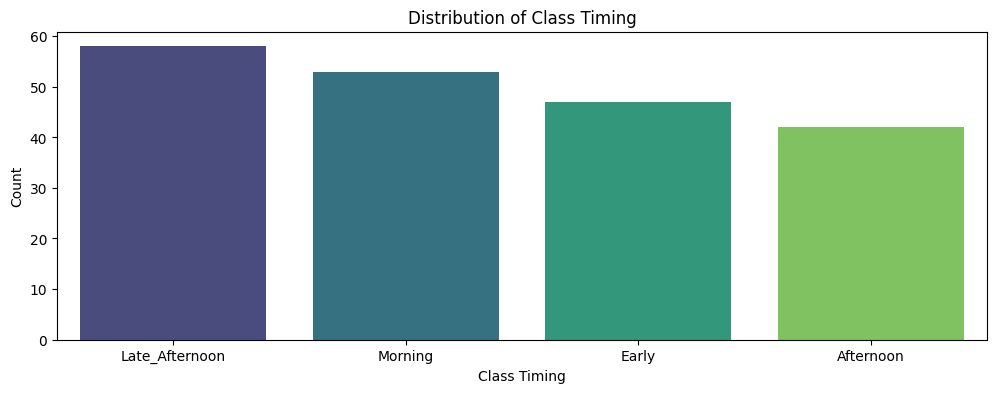

In [25]:
class_timing_counts = df['Class_Timing'].value_counts()

plt.figure(figsize=(12, 4))
sns.barplot(x=class_timing_counts.index, y=class_timing_counts.values, palette='viridis')
plt.title('Distribution of Class Timing')
plt.xlabel('Class Timing')
plt.ylabel('Count')
plt.show()

### Preprocessing the data for further model training

In [18]:

X = df.drop('Attendance', axis=1)
y = df['Attendance']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining numeric and categorical features
numeric_features = ['Past_Attendance']
categorical_features = ['Class_Timing', 'Weather_Condition', 'Day_of_Week', 'Academic_Performance', 'Health_Status']


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder())
])

# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])



### Finally generating the model

In [23]:
# Defining the Logistic Regression model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000, random_state=42))])

# Fitting the model
model.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Past_Attendance']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Class_Timing',
                                                   'Weather_Condition',
                                                   'Day_of_Week',
                                                   'Academic_Performance',
                                                   'Health_Status'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

### Moment of Truth

In [20]:
# Predicting on the X_test data
y_pred = model.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.4f}')

Model Accuracy: 0.8000


### Let's visualize our model's performance using the confusion metrix

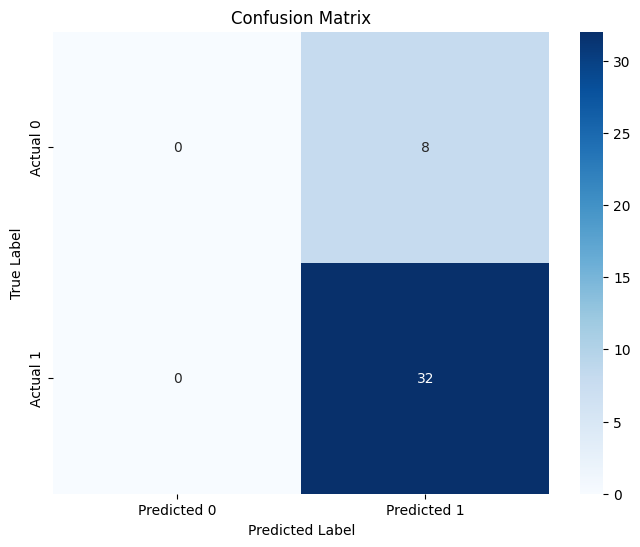

In [21]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()